<a href="https://colab.research.google.com/github/karthikmandelli/frugal-labs-/blob/main/sarima_and_arima__two_years_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data = pd.read_excel("/content/Temperature & Humidity (1).xlsx")

In [3]:
data 

,DATE,2121-01-01 00:00:00,Unnamed: 2,Unnamed: 3,Unnamed: 4,2121-02-01 00:00:00,Unnamed: 6,Unnamed: 7,Unnamed: 8,2121-03-01 00:00:00,...,Unnamed: 33,2021-10-01 00:00:00,Unnamed: 35,Unnamed: 36,2021-11-01 00:00:00,Unnamed: 38,Unnamed: 39,2021-12-01 00:00:00,Unnamed: 41,Unnamed: 42
0,NaN,Temperature,NaN,Humidity,NaN,Temperature,NaN,Humidity,NaN,Temperature,...,Humidity,Temperature,NaN,Humidity,Temperature,NaN,Humidity,Temperature,NaN,Humidity
1,NaN,Min,Max,Min,Max,Max,min,Max,min,Max,...,NaN,Max,Min,NaN,Max,Min,NaN,Max,Min,NaN
2,1.0,20,29,96,90,30,19,89,70,33,...,96,31,22,99,29,22,96,29,21,90
3,2.0,19,30,98,84,29,20,90,67,35,...,93,26,21,100,31,22,95,30,21,89
4,3.0,19,31,99,92,31,19,87,69,34,...,94,29,21,97,30,22,98,29,21,92
5,4.0,20,20,98,89,32,18,88,74,35,...,90,27,21,100,29,22,92,27,21,100
6,5.0,18,19,97,86,29,19,90,80,36,...,99,29,22,100,28,21,98,28,21,100
7,6.0,19,18,94,84,28,18,92,85,34,...,100,30,22,100,31,21,92,29,21,90
8,7.0,18,27,100,97,29,19,94,84,33,...,100,29,22,100,30,22,98,31,20,91
9,8.0,19,29,100,89,30,20,92,86,34,...,100,31,21,94,31,21,99,32,20,87


In [13]:
data = pd.read_csv("/content/temperature and humidity final csv with upto may 31.csv")

In [14]:
data.isnull().sum()

DATE              0
Maxtemperature    7
MinTemperature    7
Minhumidity       8
dtype: int64

In [122]:
data

,DATE,Maxtemperature,MinTemperature,Minhumidity,Maxhumidity
Date,,,,,
2021-01-01,01-01-2021,29.0,20.0,96.0,90.0
2021-02-01,02-01-2021,30.0,19.0,98.0,84.0
2021-03-01,03-01-2021,31.0,19.0,99.0,92.0
2021-04-01,04-01-2021,20.0,20.0,98.0,89.0
2021-05-01,05-01-2021,19.0,18.0,97.0,86.0
...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN


In [15]:
data.dtypes

DATE               object
Maxtemperature    float64
MinTemperature    float64
Minhumidity       float64
dtype: object

In [16]:
data['DATE'] = pd.to_datetime(data['DATE'])


<ipython-input-16-55f29f578728>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['DATE'] = pd.to_datetime(data['DATE'])


In [17]:
data.dtypes

DATE              datetime64[ns]
Maxtemperature           float64
MinTemperature           float64
Minhumidity              float64
dtype: object

In [18]:
# Fill missing values with preceding value
data.fillna(method='ffill', inplace=True)

In [19]:
data.isnull().sum()

DATE              0
Maxtemperature    0
MinTemperature    0
Minhumidity       0
dtype: int64

In [21]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [22]:
data = data.set_index('DATE')
data = data.sort_index()



In [26]:
data.columns

Index(['Maxtemperature', 'MinTemperature', 'Minhumidity'], dtype='object')

In [24]:
import matplotlib.pyplot as plt

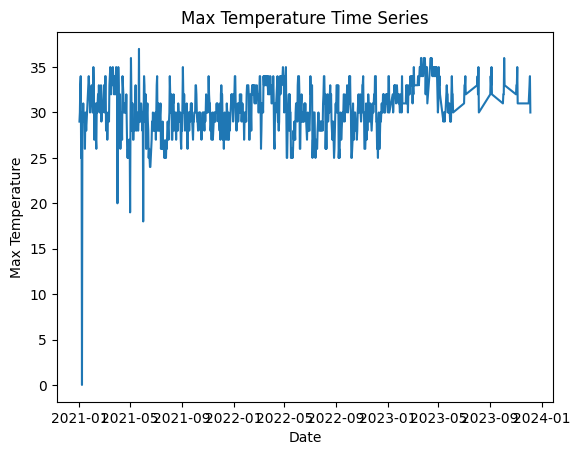

In [27]:
#Data Exploration and Visualization
plt.plot(data['Maxtemperature'])
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('Max Temperature Time Series')
plt.show()

In [29]:
train_size = int(len(data) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = data[:train_size], data[train_size:]

In [31]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
# Step 4: Train-Test Split
train_size = int(len(data) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = data[:train_size]['Maxtemperature'], data[train_size:]['Maxtemperature']

# Step 5: Model Training and Evaluation
model = ARIMA(train_data, order=(1, 1, 1))  # Example order, you can tune it
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test_data))




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [37]:
import numpy as np

In [38]:
# Evaluate the model
mse = np.mean((forecast - test_data) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(forecast - test_data))

print('Evaluation Metrics:')
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)

Evaluation Metrics:
Mean Squared Error (MSE): 8.492410813645836
Root Mean Squared Error (RMSE): 2.9141741220534225
Mean Absolute Error (MAE): 2.377141231636675


ValueError: ignored

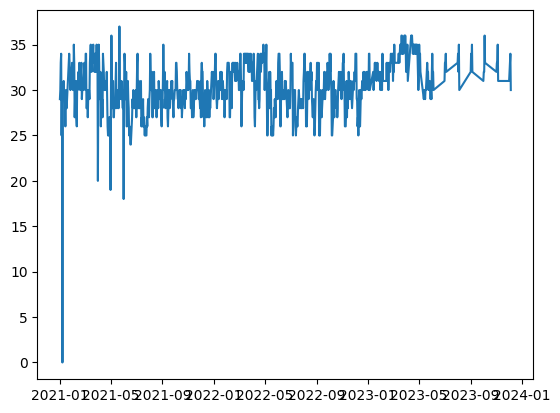

In [40]:
# Step 6: Forecasting
next_month_range = pd.date_range(start=data.index[-1], periods=30, freq='D')
next_month_forecast = model_fit.forecast(steps=30)  # Forecasting for the next 30 days

# Plot the forecasted values
plt.plot(data['Maxtemperature'], label='Historical Data')
plt.plot(next_month_range, next_month_forecast[0], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('Max Temperature Forecast')
plt.legend()
plt.show()

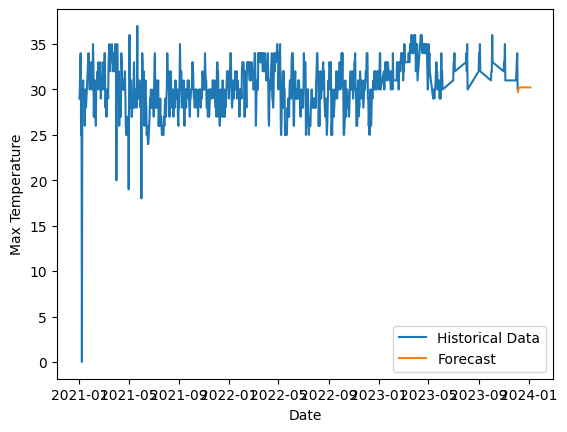

In [42]:
# Step 6: Generate Next Month Range for Forecast
next_month_start = data.index[-1] + pd.DateOffset(days=1)
next_month_end = next_month_start + pd.DateOffset(days=30)
next_month_range = pd.date_range(start=next_month_start, end=next_month_end, freq='D')

# Step 7: Generate Forecast for Next Month
next_month_forecast = model_fit.forecast(steps=len(next_month_range))

# Plot the forecasted values
plt.plot(data['Maxtemperature'], label='Historical Data')
plt.plot(next_month_range, next_month_forecast, label='Forecast')  # Remove [0]
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.legend()
plt.show()


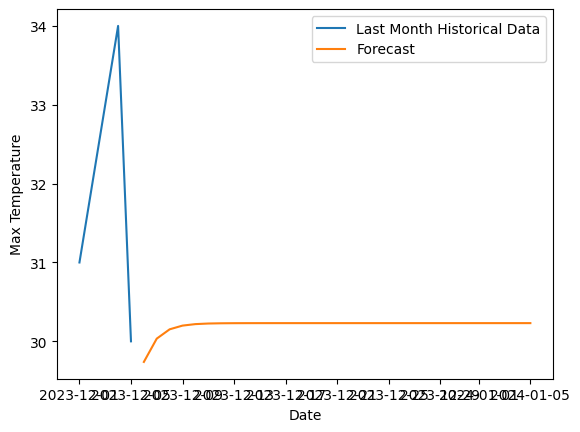

In [44]:
# Step 6: Generate Next Month Range for Forecast
next_month_start = data.index[-1] + pd.DateOffset(days=1)
next_month_end = next_month_start + pd.DateOffset(days=30)
next_month_range = pd.date_range(start=next_month_start, end=next_month_end, freq='D')

# Step 7: Generate Forecast for Next Month
next_month_forecast = model_fit.forecast(steps=len(next_month_range))

# Plot the last month of historical data and forecast label
last_month_start = next_month_start - pd.DateOffset(days=30)
last_month_data = data.loc[last_month_start:next_month_start - pd.DateOffset(days=1)]

plt.plot(last_month_data['Maxtemperature'], label='Last Month Historical Data')
plt.plot(next_month_range, next_month_forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


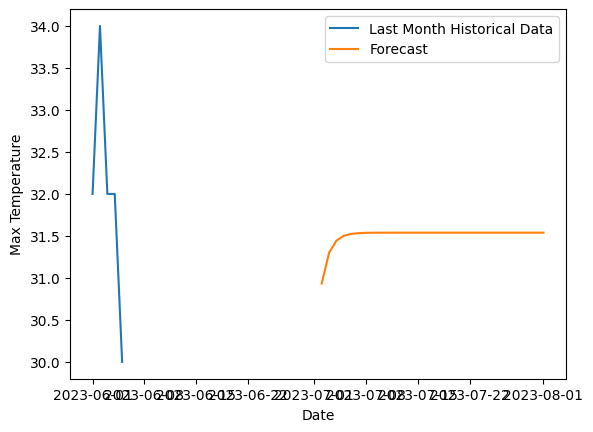

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Prepare the data
# Assuming you have the data stored in a DataFrame called "data" with a column named "Max Temperature"

# Step 2: Split the data into train and test sets
train_data = data[:-30]  # Use all but the last 30 days for training
test_data = data[-30:]   # Use the last 30 days for testing

# Step 3: Fit the ARIMA model
#model = ARIMA(train_data['Maxtemperature'], order=(1, 1, 1))  # Example order, you can tune it
#model_fit = model.fit()

# Step 4: Generate Next Month Range for Forecast
next_month_start = test_data.index[0] + pd.DateOffset(days=1)
next_month_end = next_month_start + pd.DateOffset(days=30)
next_month_range = pd.date_range(start=next_month_start, end=next_month_end, freq='D')

# Step 5: Generate Forecast for Next Month
next_month_forecast = model_fit.forecast(steps=len(next_month_range))

# Step 6: Plot the last month of historical data and forecast label
last_month_start = test_data.index[0] - pd.DateOffset(days=30)
last_month_data = data.loc[last_month_start:test_data.index[0] - pd.DateOffset(days=1)]

plt.plot(last_month_data.index, last_month_data['Maxtemperature'], label='Last Month Historical Data')
plt.plot(next_month_range, next_month_forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.legend()
plt.show()


In [48]:
ndata =data.copy()

In [50]:
ndata

,Maxtemperature,MinTemperature,Minhumidity
DATE,,,
2021-01-01,29.0,20.0,96.0
2021-01-02,30.0,19.0,89.0
2021-01-03,33.0,20.0,96.0
2021-01-04,34.0,21.0,75.0
2021-01-05,25.0,22.0,96.0
...,...,...,...
2023-12-01,31.0,16.0,89.0
2023-12-02,32.0,19.0,68.0
2023-12-03,33.0,20.0,90.0


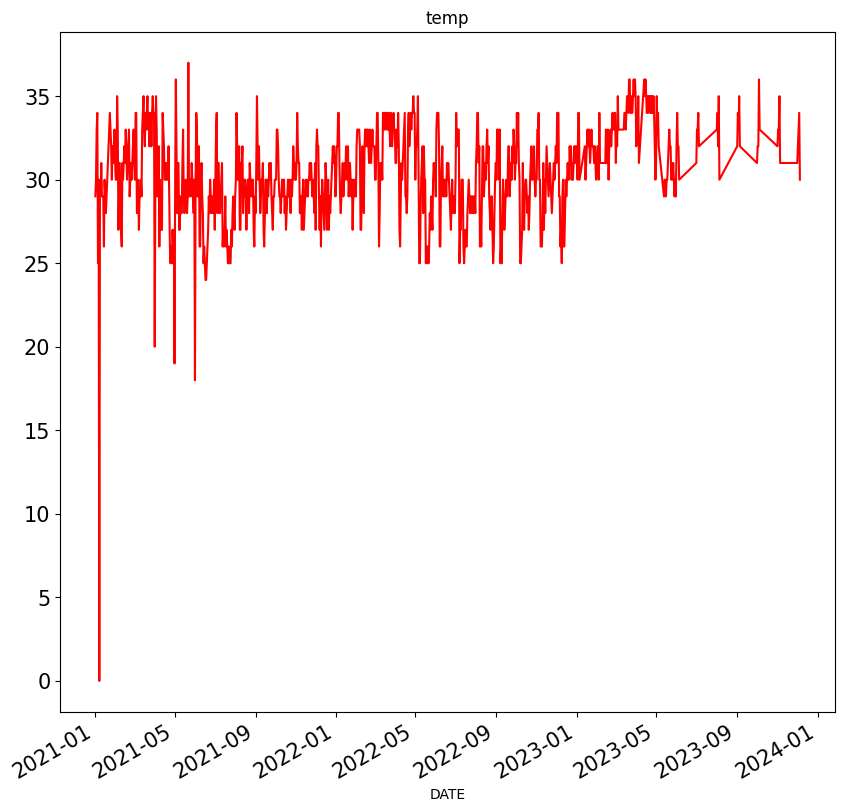

In [53]:
plt.figure(figsize =(10,10))
ndata.Maxtemperature.plot(title="temp",fontsize=15,color="red")
plt.show()

In [54]:
from statsmodels.tsa.stattools import adfuller 
def sdf_test(ndata):
  ndatatest = adfuller(ndata,autolag ="AIC")
  print("1.ADF:",ndatatest[0])
  print("2.P-value:",ndatatest[1])
  print("3.num_of_lags",ndatatest[2])
  print("4.num_of_observation:",ndatatest[3])
  print("5.crtical values:")
  for key,val in ndatatest[4].items():
    print("\t",key,": ",val)

In [55]:
sdf_test(ndata["Maxtemperature"])

1.ADF: -7.163984323659976
2.P-value: 2.918567609174536e-10
3.num_of_lags 6
4.num_of_observation: 874
5.crtical values:
	 1% :  -3.437854130362047
	 5% :  -2.8648525821630173
	 10% :  -2.5685338603647714


In [56]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.1 MB/s eta 0:00:00


In [59]:
from pmdarima import auto_arima
arimadata = auto_arima(ndata["Maxtemperature"],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3938.411, Time=1.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4211.014, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4091.207, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4007.962, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4209.014, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3939.172, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3938.192, Time=0.75 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3943.108, Time=0.78 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4067.938, Time=0.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3939.140, Time=1.90 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4027.735, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3942.029, Time=1.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3936.548, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3941.424, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0]          

In [60]:
# Step 3: Fit the ARIMA model
model = ARIMA(train_data['Maxtemperature'], order=(2, 1, 1))  # Example order, you can tune it
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


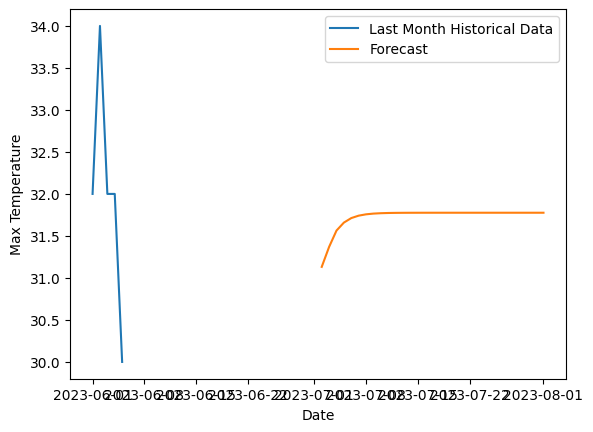

In [62]:
# Step 4: Generate Next Month Range for Forecast
next_month_start = test_data.index[0] + pd.DateOffset(days=1)
next_month_end = next_month_start + pd.DateOffset(days=30)
next_month_range = pd.date_range(start=next_month_start, end=next_month_end, freq='D')

# Step 5: Generate Forecast for Next Month
next_month_forecast = model_fit.forecast(steps=len(next_month_range))

# Step 6: Plot the last month of historical data and forecast label
last_month_start = test_data.index[0] - pd.DateOffset(days=30)
last_month_data = data.loc[last_month_start:test_data.index[0] - pd.DateOffset(days=1)]

plt.plot(last_month_data.index, last_month_data['Maxtemperature'], label='Last Month Historical Data')
plt.plot(next_month_range, next_month_forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.legend()
plt.show()


In [61]:
# Step 3: Generate the forecast for the month of June
june_start = pd.to_datetime('2023-06-01')
june_end = pd.to_datetime('2023-06-30')
june_range = pd.date_range(start=june_start, end=june_end, freq='D')
june_forecast = model_fit.forecast(steps=len(june_range))

# Step 4: Print the predicted dates and corresponding maximum temperatures for June
for date, temp in zip(june_range, june_forecast):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Max Temperature: {temp}")

Date: 2023-06-01, Max Temperature: 31.131656860816104
Date: 2023-06-02, Max Temperature: 31.369688418332604
Date: 2023-06-03, Max Temperature: 31.563990412946243
Date: 2023-06-04, Max Temperature: 31.658882645759398
Date: 2023-06-05, Max Temperature: 31.712477938140285
Date: 2023-06-06, Max Temperature: 31.741368879419177
Date: 2023-06-07, Max Temperature: 31.757169740202592
Date: 2023-06-08, Max Temperature: 31.765772328379565
Date: 2023-06-09, Max Temperature: 31.77046255056101
Date: 2023-06-10, Max Temperature: 31.773018575021617
Date: 2023-06-11, Max Temperature: 31.774411721759716
Date: 2023-06-12, Max Temperature: 31.775171015584558
Date: 2023-06-13, Max Temperature: 31.77558485206298
Date: 2023-06-14, Max Temperature: 31.77581040361888
Date: 2023-06-15, Max Temperature: 31.775933335198374
Date: 2023-06-16, Max Temperature: 31.776000336141454
Date: 2023-06-17, Max Temperature: 31.77603685342184
Date: 2023-06-18, Max Temperature: 31.776056756301582
Date: 2023-06-19, Max Temperatur

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [63]:
import statsmodels.api as sm

In [65]:
train=ndata.iloc[:-30]
test=ndata.iloc[-30:]
print(train.shape,test.shape)
print(ndata.shape)

(851, 3) (30, 3)
(881, 3)


In [66]:
model = sm.tsa.arima.ARIMA(train["Maxtemperature"],order=(2,1,1))
model = model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Maxtemperature   No. Observations:                  851
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1903.788
Date:                Tue, 06 Jun 2023   AIC                           3815.576
Time:                        07:15:58   BIC                           3834.557
Sample:                             0   HQIC                          3822.847
                                - 851                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3745      0.014     26.896      0.000       0.347       0.402
ar.L2          0.0929      0.027      3.417      0.001       0.040       0.146
ma.L1         -0.9573      0.013    -73.986      0.000      -0.983      -0.932
sigma2         5.1543      0.092     55.764      0.000       4.973       5.336
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             37172.40
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -2.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
start = len(train)
end = len(train)+len(test)-1
pred=model.predict(start=start,end =end,typ="levels").rename("ARIMA predictions")
pred.index = ndata.index[start:end+1]
print(pred)
pred.dtypes

DATE
2023-07-01    31.131657
2023-07-02    31.369688
2023-07-03    31.563990
2023-07-04    31.658883
2023-07-05    31.712478
2023-08-01    31.741369
2023-08-02    31.757170
2023-08-03    31.765772
2023-08-04    31.770463
2023-08-05    31.773019
2023-09-01    31.774412
2023-09-02    31.775171
2023-09-03    31.775585
2023-09-04    31.775810
2023-09-05    31.775933
2023-10-01    31.776000
2023-10-02    31.776037
2023-10-03    31.776057
2023-10-04    31.776068
2023-10-05    31.776074
2023-11-01    31.776077
2023-11-02    31.776078
2023-11-03    31.776079
2023-11-04    31.776080
2023-11-05    31.776080
2023-12-01    31.776080
2023-12-02    31.776080
2023-12-03    31.776081
2023-12-04    31.776081
2023-12-05    31.776081
Name: ARIMA predictions, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


dtype('float64')

<Axes: xlabel='DATE'>

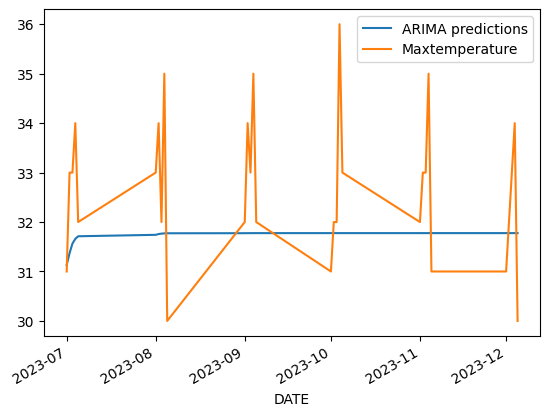

In [68]:
pred.plot(legend = True)
test["Maxtemperature"].plot(legend =True)

In [69]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [71]:
rmse=sqrt(mean_squared_error(pred,test["Maxtemperature"]))

In [72]:
rmse

1.7495150529985783

In [73]:
model2 = sm.tsa.arima.ARIMA(ndata["Maxtemperature"],order=(2,1,1))
model2=model2.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [78]:
future_dates = pd.date_range(start="01-05-2023",end="30-05-2023")
print(future_dates)

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14',
               ...
               '2023-05-21', '2023-05-22', '2023-05-23', '2023-05-24',
               '2023-05-25', '2023-05-26', '2023-05-27', '2023-05-28',
               '2023-05-29', '2023-05-30'],
              dtype='datetime64[ns]', length=146, freq='D')


<ipython-input-78-bbac4ae40bdb>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  future_dates = pd.date_range(start="01-05-2023",end="30-05-2023")


In [77]:
pred = model2.predict(start=len(ndata),end=len(ndata)+29,types="levels").rename("Arima Prediction")
pred.index = future_dates
pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ValueError: ignored

<ipython-input-83-8dca766f3504>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['DATE'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

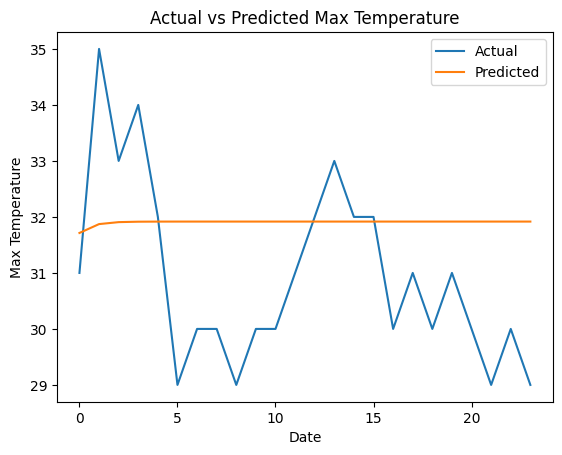

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Date: 01/06/2023, Max Temperature: 30.477790371458532
Date: 02/06/2023, Max Temperature: 30.477790371458532
Date: 03/06/2023, Max Temperature: 30.477790371458532
Date: 04/06/2023, Max Temperature: 30.477790371458532
Date: 05/06/2023, Max Temperature: 30.477790371458532
Date: 06/06/2023, Max Temperature: 30.477790371458532
Date: 07/06/2023, Max Temperature: 30.477790371458532
Date: 08/06/2023, Max Temperature: 30.477790371458532
Date: 09/06/2023, Max Temperature: 30.477790371458532
Date: 10/06/2023, Max Temperature: 30.477790371458532
Date: 11/06/2023, Max Temperature: 30.477790371458532
Date: 12/06/2023, Max Temperature: 30.477790371458532
Date: 13/06/2023, Max Temperature: 30.477790371458532
Date: 14/06/2023, Max Temperature: 30.477790371458532
Date: 15/06/2023, Max Temperature: 30.477790371458532
Date: 16/06/2023, Max Temperature: 30.477790371458532
Date: 17/06/2023, Max Temperature: 30.477790371458532
Date: 18/06/2023, Max Temperature: 30.477790371458532
Date: 19/06/2023, Max Temper

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Step 1: Prepare the data
# Assuming you have the data stored in a DataFrame called "data" with columns "Date" and "Max Temperature"
# Make sure the "Date" column is set as the index of the DataFrame and convert it to datetime format
data = pd.read_csv("/content/final.csv")
data['Date'] = pd.to_datetime(data['DATE'])
data.set_index('Date', inplace=True)

# Step 2: Split the data into training and testing sets
train_data = data['Maxtemperature'].loc[:'2023-04-30']
test_data = data['Maxtemperature'].loc['2023-05-01':'2023-05-31']

# Step 3: Fit the ARIMA model on the training data
model = ARIMA(train_data, order=(1, 1, 1))  # Example order, you can tune it
model_fit = model.fit()

# Step 4: Generate the forecast for the month of May
forecast_start = len(train_data)
forecast_end = len(train_data) + len(test_data) - 1
forecast = model_fit.predict(start=forecast_start, end=forecast_end)

# Step 5: Compare the actual versus predicted values
actual = test_data.values
predicted = forecast.values

# Step 6: Calculate the error (root mean squared error)
rmse = mean_squared_error(actual, predicted, squared=False)

# Step 7: Plot the actual and predicted values
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('Actual vs Predicted Max Temperature')
plt.legend()
plt.show()

# Step 8: Update the model using the entire dataset
model_final = ARIMA(data['Maxtemperature'], order=(2, 1, 1))  # Example order, you can tune it
model_final_fit = model_final.fit()

# Step 9: Generate the forecast for the month of June
june_start = pd.to_datetime('01/06/2023', format='%d/%m/%Y')
june_end = pd.to_datetime('30/06/2023', format='%d/%m/%Y')
june_range = pd.date_range(start=june_start, end=june_end, freq='D')
june_forecast = model_final_fit.forecast(steps=len(june_range))

# Step 10: Print the predicted dates and corresponding maximum temperatures for June
for date, temp in zip(june_range, june_forecast):
    print(f"Date: {date.strftime('%d/%m/%Y')}, Max Temperature: {temp}")


<ipython-input-108-5b5e72a03e8d>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['DATE'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


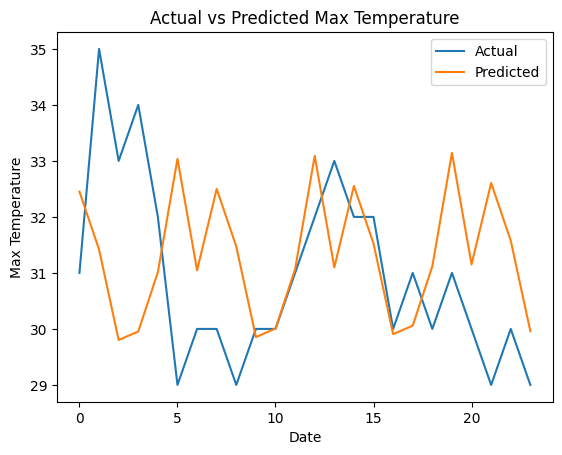

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Date: 01/06/2023, MaxTemperature: 30.303317018782476
Date: 02/06/2023, MaxTemperature: 30.050938086675927
Date: 03/06/2023, MaxTemperature: 29.703905609714592
Date: 04/06/2023, MaxTemperature: 30.00910759801056
Date: 05/06/2023, MaxTemperature: 30.130748463663746
Date: 06/06/2023, MaxTemperature: 30.131110878307926
Date: 07/06/2023, MaxTemperature: 30.017071074488335
Date: 08/06/2023, MaxTemperature: 29.869521397188183
Date: 09/06/2023, MaxTemperature: 29.856169326838657
Date: 10/06/2023, MaxTemperature: 30.190392628849562
Date: 11/06/2023, MaxTemperature: 30.527187033916533
Date: 12/06/2023, MaxTemperature: 30.2687800890492
Date: 13/06/2023, MaxTemperature: 30.296197666914505
Date: 14/06/2023, MaxTemperature: 30.043818734807957
Date: 15/06/2023, MaxTemperature: 29.69678625784662
Date: 16/06/2023, MaxTemperature: 30.001988246142588
Date: 17/06/2023, MaxTemperature: 30.123629111795776
Date: 18/06/2023, MaxTemperature: 30.123991526439955
Date: 19/06/2023, MaxTemperature: 30.0099517226203

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Step 1: Prepare the data
# Assuming you have the data stored in a DataFrame called "data" with columns "Date" and "Max Temperature"
# Make sure the "Date" column is set as the index of the DataFrame and convert it to datetime format

data['Date'] = pd.to_datetime(data['DATE'])
data.set_index('Date', inplace=True)

# Step 2: Split the data into training and testing sets
train_data = data['Maxtemperature'].loc[:'2023-04-30']
test_data = data['Maxtemperature'].loc['2023-05-01':'2023-05-31']

# Step 3: Fit the SARIMA model on the training data
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(0, 1, 0, 7)) # Example orders, you can tune them
model_fit = model.fit()

# Step 4: Generate the forecast for the month of May
forecast_start = len(train_data)
forecast_end = len(train_data) + len(test_data) - 1
forecast = model_fit.predict(start=forecast_start, end=forecast_end)

# Step 5: Compare the actual versus predicted values
actual = test_data.values
predicted = forecast.values

# Step 6: Calculate the error (root mean squared error)
rmse = mean_squared_error(actual, predicted, squared=False)

# Step 7: Plot the actual and predicted values
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('Actual vs Predicted Max Temperature')
plt.legend()
plt.show()

# Step 8: Update the model using the entire dataset
model_final = SARIMAX(data['Maxtemperature'], order=(2, 1, 1), seasonal_order=(1, 1, 1, 12))  # Example orders, you can tune them
model_final_fit = model_final.fit()

# Step 9: Generate the forecast for the month of June
june_start = pd.to_datetime('01/06/2023', format='%d/%m/%Y')
june_end = pd.to_datetime('30/06/2023', format='%d/%m/%Y')
june_range = pd.date_range(start=june_start, end=june_end, freq='D')
june_forecast = model_final_fit.predict(start=len(data), end=len(data) + len(june_range) - 1)

# Step 10: Print the predicted dates and corresponding maximum temperatures for June
for date, temp in zip(june_range, june_forecast):
    print(f"Date: {date.strftime('%d/%m/%Y')}, MaxTemperature: {temp}")


In [109]:
predicted

array([32.45023433, 31.41905709, 29.80212966, 29.95359657, 31.01348659,
       33.03716711, 31.04653039, 32.50046696, 31.47075359, 29.85440496,
       30.00610073, 31.06608125, 33.08979755, 31.09917497, 32.55311714,
       31.52340598, 29.90705823, 30.05875435, 31.118735  , 33.14245135,
       31.1518288 , 32.60577097, 31.57605982, 29.95971207])

In [112]:
train_data.isnull().sum()
train_data.fillna(method="ffill",inplace=True)

In [113]:
train_data.isnull().sum()

0

In [115]:
from pmdarima import auto_arima

# Fit auto_arima to your data
model = auto_arima(train_data, seasonal=True, m=7)

# Print the best order parameters
print(model.order)
print(model.seasonal_order)


(1, 1, 2)
(1, 0, 0, 7)


<ipython-input-124-cb3ab60b46f9>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['DATE'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

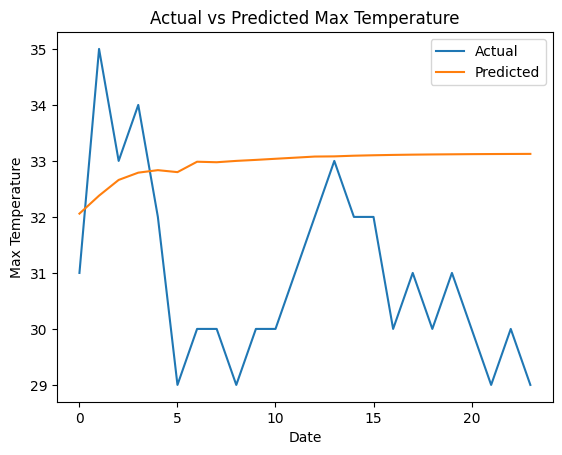

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Date: 01/06/2023, MaxTemperature: 30.303317018782476
Date: 02/06/2023, MaxTemperature: 30.050938086675927
Date: 03/06/2023, MaxTemperature: 29.703905609714592
Date: 04/06/2023, MaxTemperature: 30.00910759801056
Date: 05/06/2023, MaxTemperature: 30.130748463663746
Date: 06/06/2023, MaxTemperature: 30.131110878307926
Date: 07/06/2023, MaxTemperature: 30.017071074488335
Date: 08/06/2023, MaxTemperature: 29.869521397188183
Date: 09/06/2023, MaxTemperature: 29.856169326838657
Date: 10/06/2023, MaxTemperature: 30.190392628849562
Date: 11/06/2023, MaxTemperature: 30.527187033916533
Date: 12/06/2023, MaxTemperature: 30.2687800890492
Date: 13/06/2023, MaxTemperature: 30.296197666914505
Date: 14/06/2023, MaxTemperature: 30.043818734807957
Date: 15/06/2023, MaxTemperature: 29.69678625784662
Date: 16/06/2023, MaxTemperature: 30.001988246142588
Date: 17/06/2023, MaxTemperature: 30.123629111795776
Date: 18/06/2023, MaxTemperature: 30.123991526439955
Date: 19/06/2023, MaxTemperature: 30.0099517226203

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Step 1: Prepare the data

data['Date'] = pd.to_datetime(data['DATE'])
data.set_index('Date', inplace=True)

# Step 2: Split the data into training and testing sets
train_data = data['Maxtemperature'].loc[:'2023-04-30']
test_data = data['Maxtemperature'].loc['2023-05-01':'2023-05-31']

# Step 3: Fit the SARIMA model on the training data
model = SARIMAX(train_data, order=(1, 1, 2), seasonal_order=(1, 0, 0, 7)) # Example orders, you can tune them
model_fit = model.fit()

# Step 4: Generate the forecast for the month of May
forecast_start = len(train_data)
forecast_end = len(train_data) + len(test_data) - 1
forecast = model_fit.predict(start=forecast_start, end=forecast_end)

# Step 5: Compare the actual versus predicted values
actual = test_data.values
predicted = forecast.values

# Step 6: Calculate the error (root mean squared error)
rmse = mean_squared_error(actual, predicted, squared=False)

# Step 7: Plot the actual and predicted values
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('Actual vs Predicted Max Temperature')
plt.legend()
plt.show()

# Step 8: Update the model using the entire dataset
model_final = SARIMAX(data['Maxtemperature'], order=(2, 1, 1), seasonal_order=(1, 1, 1, 12))  # Example orders, you can tune them
model_final_fit = model_final.fit()

# Step 9: Generate the forecast for the month of June
june_start = pd.to_datetime('01/06/2023', format='%d/%m/%Y')
june_end = pd.to_datetime('30/06/2023', format='%d/%m/%Y')
june_range = pd.date_range(start=june_start, end=june_end, freq='D')
june_forecast = model_final_fit.predict(start=len(data), end=len(data) + len(june_range) - 1)

# Step 10: Print the predicted dates and corresponding maximum temperatures for June
for date, temp in zip(june_range, june_forecast):
    print(f"Date: {date.strftime('%d/%m/%Y')}, MaxTemperature: {temp}")


In [125]:
!pip install colabcode
!pip install fastapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of nbclassic to determine which version is compatible with other requirements. This could take a

In [126]:
from colabcode import ColabCode
from fastapi import FastAPI

In [127]:
cc = ColabCode(port=12000, code=False)

In [131]:
app =FastAPI()
@app.get("karthik")
async def read_root():
  return{"message":"karthik colab"}

In [ ]:
cc.run_app(app=app)

INFO:     Started server process [877]
INFO:uvicorn.error:Started server process [877]
INFO:     Waiting for application startup.
INFO:uvicorn.error:Waiting for application startup.
INFO:     Application startup complete.
INFO:uvicorn.error:Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:12000 (Press CTRL+C to quit)
INFO:uvicorn.error:Uvicorn running on http://127.0.0.1:12000 (Press CTRL+C to quit)


Public URL: NgrokTunnel: "https://32f5-34-125-23-56.ngrok.io" -> "http://localhost:12000"
INFO:     2401:4900:1cbc:6f8a:ac60:917e:bf9c:1436:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     2401:4900:1cbc:6f8a:ac60:917e:bf9c:1436:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
